# Задача №3

![image.png](images/problem3.png)

Подключаем необходимые библиотеки

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

$$f(x) = \frac{1}{1 + 25 x^2}$$

In [ ]:
def func(x):
    return 1 / (1 + 25 * x**2)

$$x_k =\frac{2k}{n} - 1$$

$$k \in \{0, 1, 2, ..., n\}$$

In [ ]:
def get_default_Xi(n):
    return np.array([2 * i / n - 1 
                     for i in range(n + 1)])


$$\tilde{x}_k = \frac{1}{2}(a+b) + \frac{1}{2}(b-a) \cos\left(\frac{2k+1}{2n+2}\pi\right)$$

$$k \in \{0, 1, 2, ..., n\}$$

In [ ]:
def get_chebyshev_Xi(n, a = -1, b = 1):
    return np.array([(a + b) / 2 + (b - a) / 2 * np.cos((2 * k + 1) / (2 * n + 2) * np.pi) 
                     for k in range(n + 1)])

Интерполяционный полином в форме Лагранжа

$$P_n(x) = \sum_{i=0}^n{\left(y_i\prod_{i \neq j}{\frac{x-x_j}{x_i-x_j}}\right)}$$

In [52]:
def get_interpolation(X: np.array, Y: np.array):
    if (X.shape[0] != Y.shape[0]):
        raise ValueError()
    n = X.shape[0]
        
    def basic_polinom(i, x):
        result = 1
        for j in range(n):
            if j != i:
                result *= (x - X[j]) / (X[i] - X[j])
        return result
        
    def P(x):
        sum = 0
        for i in range(n):
            sum += Y[i] * basic_polinom(i, x)
        return sum
    
    return P


In [132]:
def draw_interpolation(get_points_func, title=""):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

    count = 400 # количество точек используемное для построения графика

    for ax, n in zip(axes.flat, range(3, 11)):
        X = get_points_func(n)
        Y = func(X)
        P = get_interpolation(X, Y)

        x = np.linspace(-1, 1, count)

        loss = np.abs(P(x) - func(x))
        sum_loss = np.sum(loss) / count

        ax.plot(x, P(x), label="f(x)")
        ax.plot(x, func(x), label=f"P_{n}(x)")
        ax.legend()
        ax.scatter(X, Y)
        ax.set_title(f'n={n}')
        ax.grid(True) 
        ax.axhline(y=0, color='black', linewidth=1)
        ax.axvline(x=0, color='black', linewidth=1)

        ax.text(0.05, 0.95, f'Loss: {sum_loss:.4f}', transform=ax.transAxes, 
                verticalalignment='top', horizontalalignment='left', 
                bbox=dict(facecolor='white', alpha=0.5))

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()    
    plt.show()

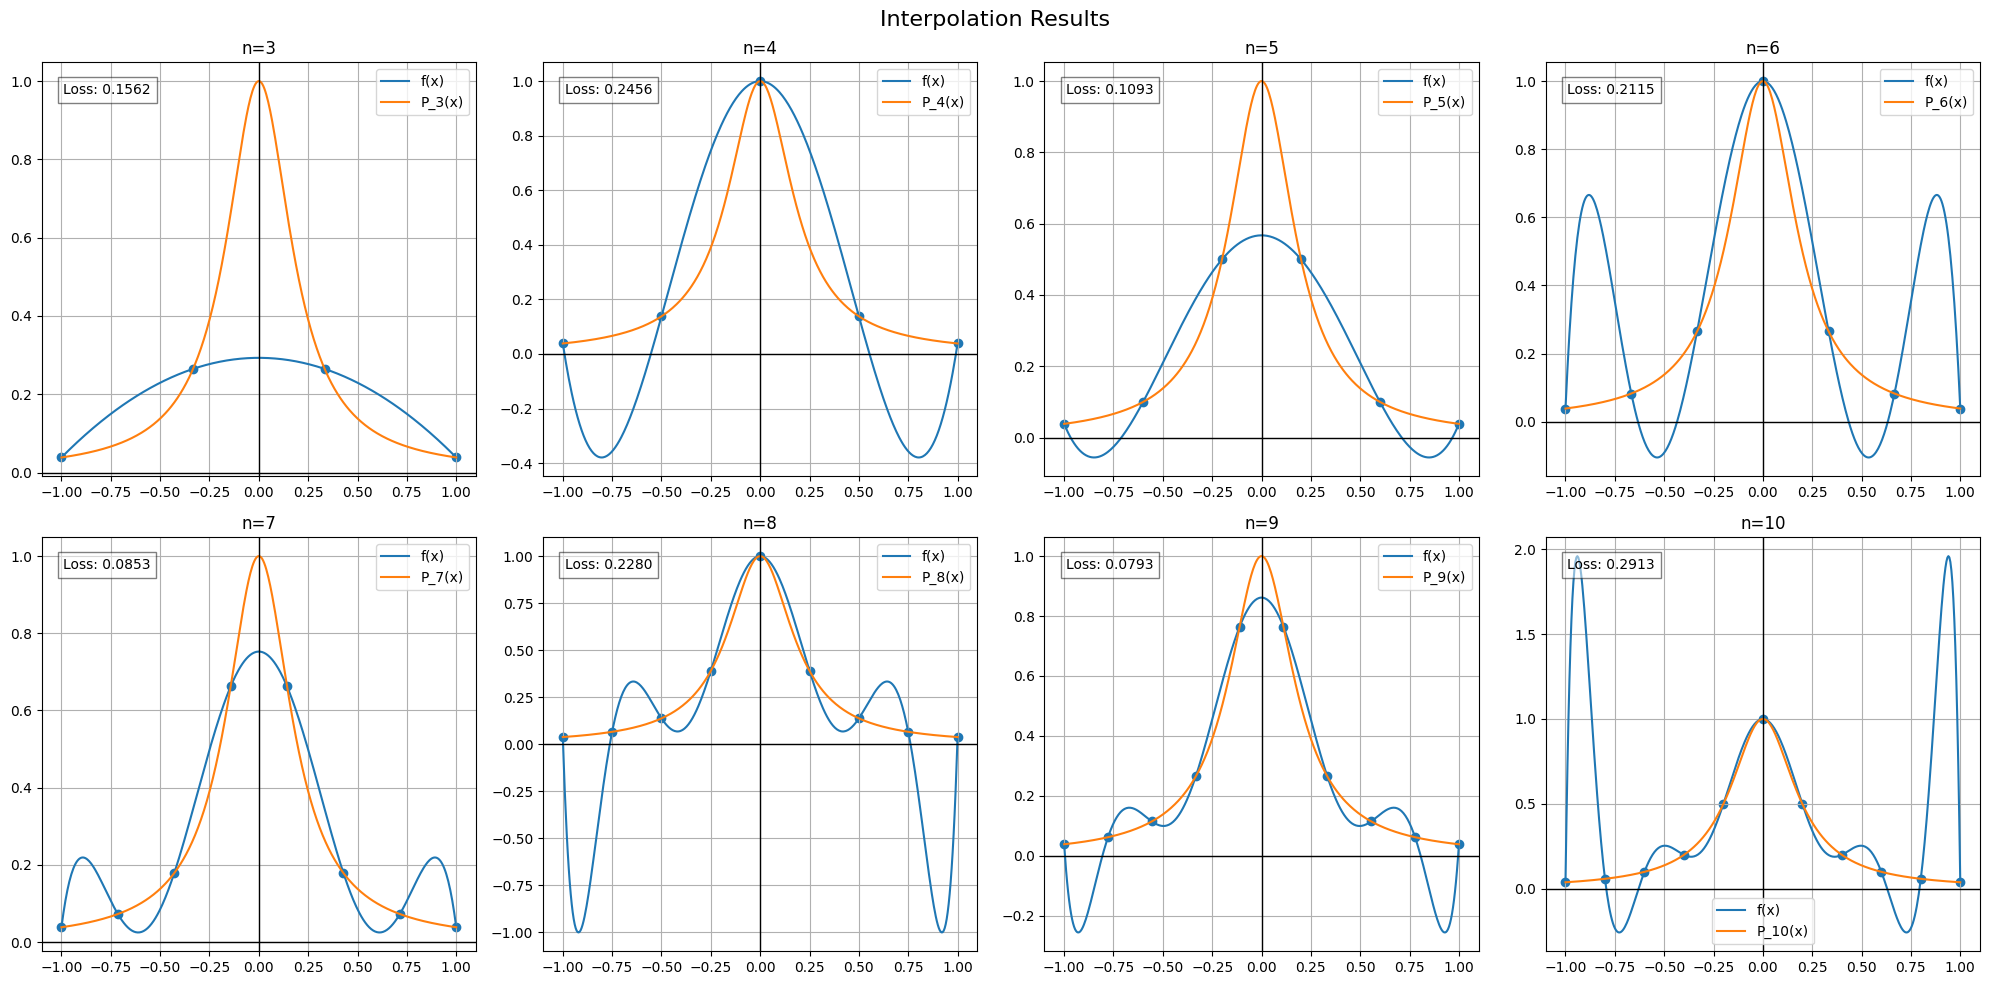

In [133]:
draw_interpolation(get_default_Xi, title='Interpolation Results')

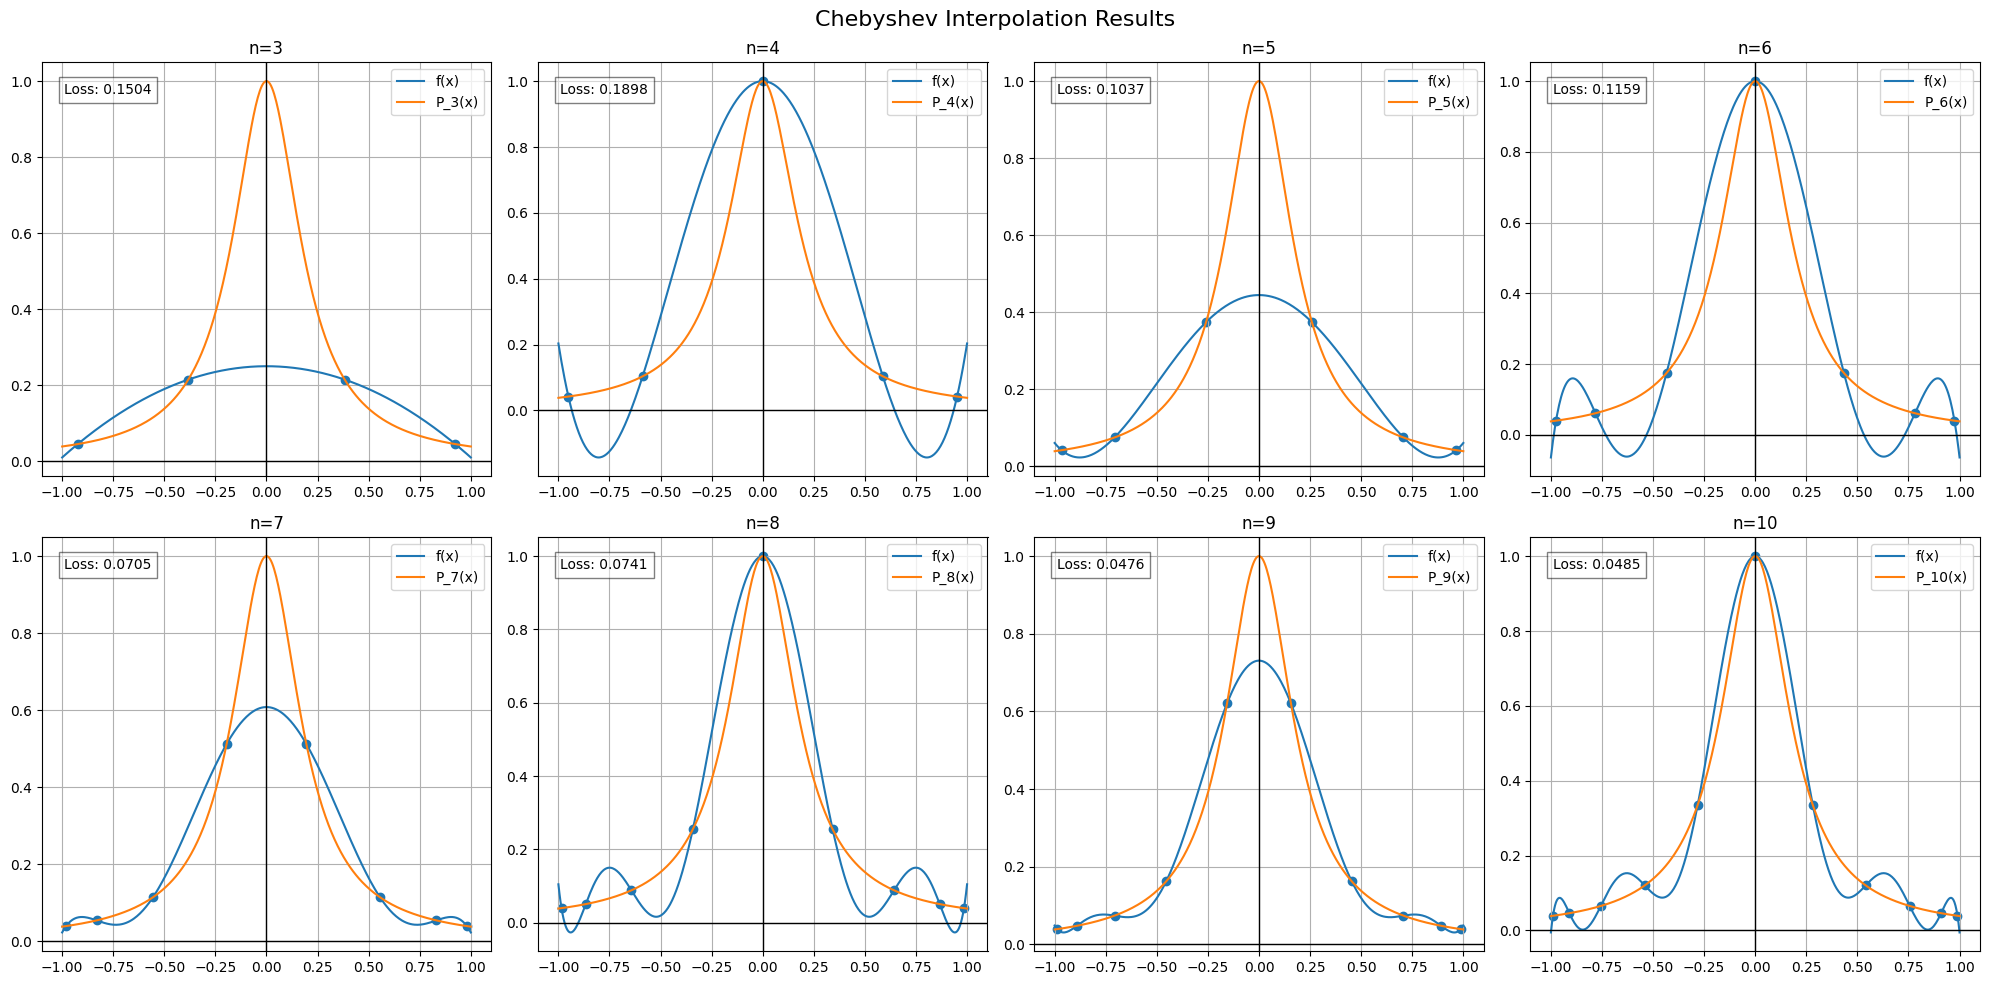

In [134]:
draw_interpolation(get_chebyshev_Xi, title='Chebyshev Interpolation Results')

In [124]:

def draw_losses(get_points_func, title: str, callback_losses=None):

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

    count = 400
    min_loss = np.inf
    max_loss = -np.inf

    for ax, n in zip(axes.flat, range(3, 11)):
        X = get_points_func(n)
        Y = func(X)
        P = get_interpolation(X, Y)

        x = np.linspace(-1, 1, count)

        loss = np.abs(P(x) - func(x))
        min_loss = min(min_loss, np.min(loss))
        max_loss = max(max_loss, np.max(loss))
        if callback_losses is not None:
            sum_loss = np.sum(loss) / count
            callback_losses[n] = sum_loss

        ax.plot(x, loss, label=f"|P_{n}(x) - f(x)|")
        ax.legend()
        ax.set_title(f'n={n}')
        ax.grid(True) 
        ax.axhline(y=0, color='black', linewidth=1)
        ax.axvline(x=0, color='black', linewidth=1)

        ax.text(0.05, 0.95, f'Loss: {sum_loss:.4f}', transform=ax.transAxes, 
                verticalalignment='top', horizontalalignment='left', 
                bbox=dict(facecolor='white', alpha=0.5))
        
    # Выравниваем все графики по масштабу
    for ax in axes.flat:
        ax.set_ylim(min_loss, max_loss)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()    
    plt.show()

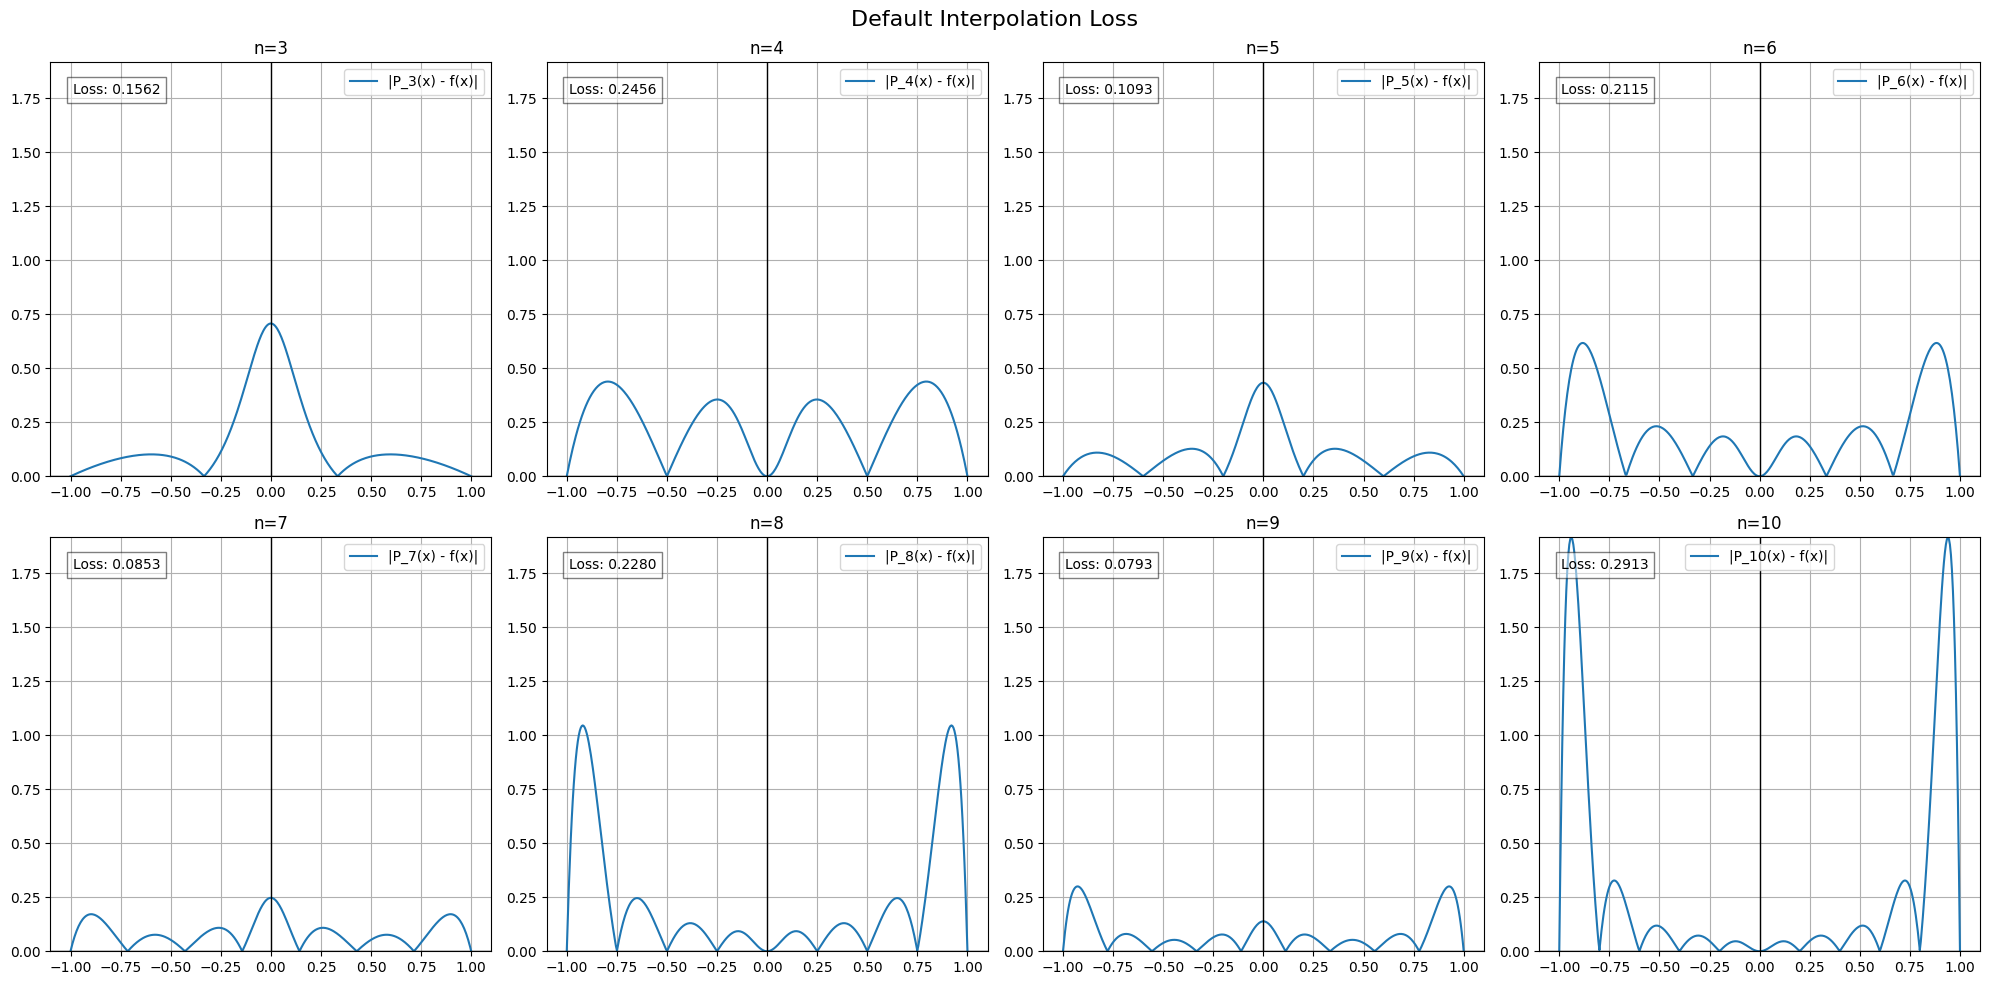

In [127]:
losses = {}
draw_losses(get_default_Xi, 'Default Interpolation Loss', callback_losses=losses)

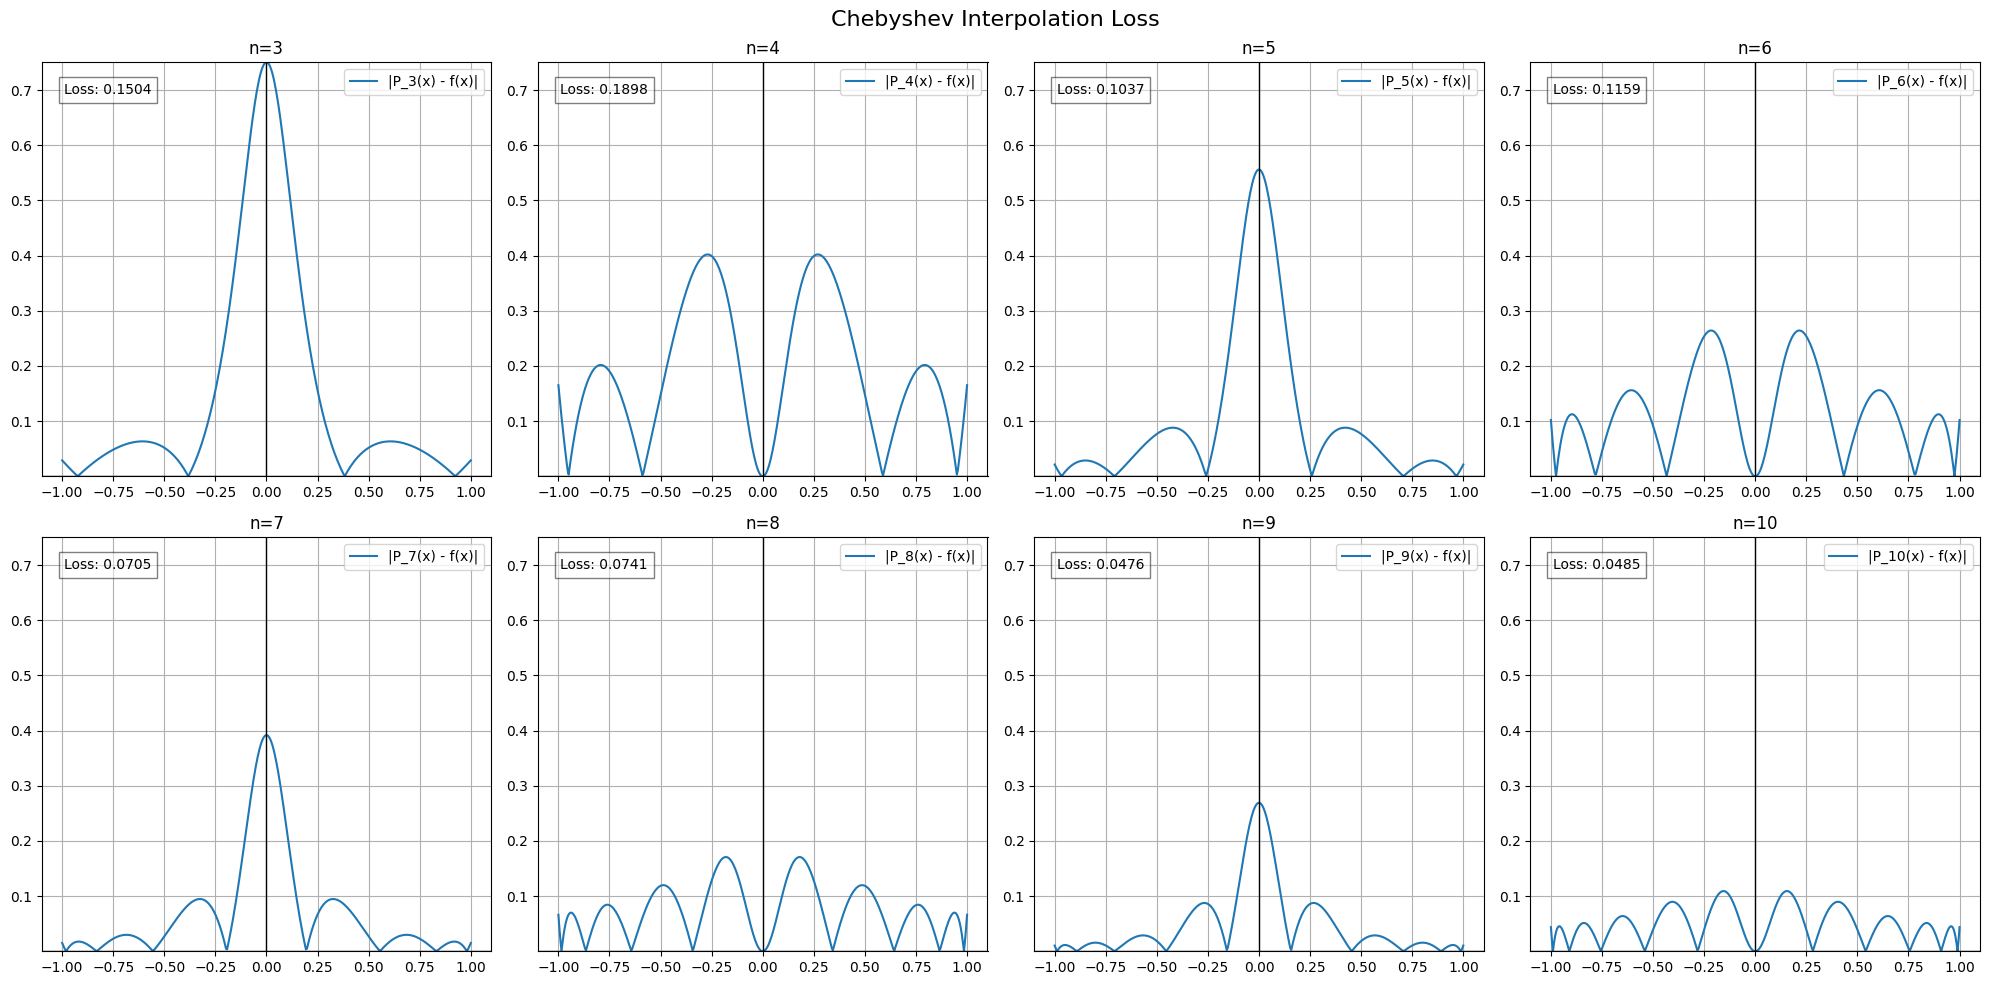

In [128]:
chebyshev_losses = {}
draw_losses(get_chebyshev_Xi, 'Chebyshev Interpolation Loss', callback_losses=chebyshev_losses)

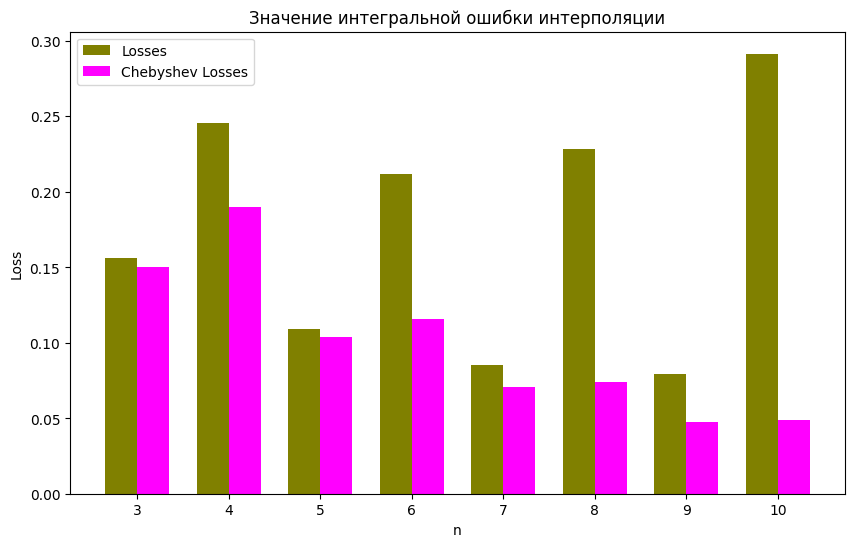

In [126]:
n_values = list(losses.keys())
loss_values = list(losses.values())
cheb_loss_values = list(chebyshev_losses.values())

bar_width = 0.35
index = np.arange(len(n_values))

plt.figure(figsize=(10, 6))
plt.bar(index, loss_values, bar_width, label='Losses', color="olive")
plt.bar(index + bar_width, cheb_loss_values, bar_width, label='Chebyshev Losses', color='magenta')

plt.xlabel('n')
plt.ylabel('Loss')
plt.title('Значение интегральной ошибки интерполяции')
plt.xticks(index + bar_width / 2, n_values)
plt.legend()

plt.show()

Феномен Рунге заключается в том, что при использовании равномерно распределённых узлов для интерполяции функций, особенно полиномами высокой степени, ошибки интерполяции могут значительно возрастать на концах интервала интерполяции. Это связано с тем, что полиномы высокой степени могут испытывать большие колебания на концах интервала.


Функция $f(x) = \frac{1}{1 + 25x^2}$ имеет острый пик в середине интервала и быстро убывает к краям. При использовании равномерных узлов интерполяции полиномы высокой степени не могут хорошо аппроксимировать поведение функции на краях, что приводит к значительным ошибкам. Чебышёвские узлы, с другой стороны, сосредоточены ближе к концам интервала, что помогает лучше аппроксимировать поведение функции и уменьшить ошибку.


Чебышёвские узлы минимизируют максимальное значение произведения $\prod_{i=0}^n (x - x_i)$ на интервале $[-1, 1]$, что позволяет значительно уменьшить ошибку интерполяции. Узлы Чебышёва $\tilde{x}_i$ определяются как:
$$
\tilde{x}_i = \cos\left(\frac{2i+1}{2(n+1)} \pi\right), \quad i \in \{0, 1, \ldots, n\}
$$
Использование таких узлов помогает равномерно распределить интерполяционные ошибки и уменьшить их максимальное значение.